# LAB | PCA

## Introduction
In this lesson, we will look at a dataset of cats and a dataset of dogs and see whether reducing them to two dimensions allows us to see if the data is separable.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1 - Reading and Standardizing the Data

In this challenge we will work with image data and reduce the dimensions of the data to create a 2 dimensional plot. While we have not worked much with image data before, it can be represented as a numpy array where each pixel is assigned a numeric value. We will start by loading and processing the data. Run the cell below to load the two csv files and convert them into numpy arrays.

In [3]:
# Run this code
cats = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", header=None)).T
dogs = np.array(pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", header=None)).T

Next, we'll examine the shape of both the cats and the dogs arrays. Print out both shapes below.

In [4]:
cats.shape, dogs.shape

((80, 4096), (80, 4096))

What this means is that both arrays contain 80 images each (the number of columns). Each image is comprised of 64x64 pixels (so a total of 4096 pixels per image). The images have been flattened such that all 4096 are in a single row.

Print out column 0 of the cats array to see what the pixels values look like.

In [5]:
cats[0]

array([64, 64, 64, ..., 64, 64, 61], dtype=int64)

Using `matplotlib` we can plot a single cat or a single dog. We do this by reshaping the vector back to a 64x64 image and then using the `imshow` function.

Run the code below to look at the first dog and the first cat.

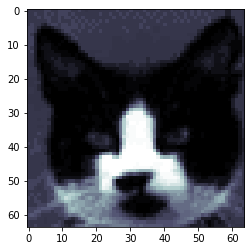

In [6]:
# Run this code:
fig, ax = plt.subplots()
ax.imshow(cats[0].reshape(64,64).T, cmap=plt.cm.bone, interpolation='nearest');

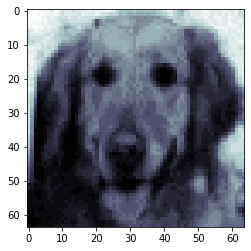

In [7]:
# Run this code:
fig, ax = plt.subplots()
ax.imshow(dogs[0].reshape(64, 64).T, cmap=plt.cm.bone, interpolation='nearest');

Now, use the `np.concatenate` function to combine the cats and dogs arrays. Use `axis=1` to combine the two correctly. Make sure to put dogs first.

In [8]:
arrays = np.concatenate([dogs, cats], axis = 0)

Next, we would like to create a standardization function. This function will find the mean and standard deviation of each image. We subtract the mean from each pixel and divide each pixel by the standard deviation. Write the function below.

In [9]:
from sklearn.preprocessing import StandardScaler 

In [10]:
standard = StandardScaler()
X_std = standard.fit_transform(arrays)
X_std

array([[ 1.62729443,  1.73140122,  1.72275667, ..., -0.13587854,
        -0.12814121, -0.12602345],
       [ 0.38158288,  0.33482835,  0.06509765, ..., -0.0777098 ,
         0.22258027,  0.22212766],
       [ 0.32800389,  0.50241709,  0.38281563, ...,  0.08225423,
        -0.06968763, -0.06799826],
       ...,
       [-0.56944422, -0.69863558, -0.50126918, ..., -0.06316762,
         0.1348999 , -0.06799826],
       [ 1.61389968,  1.73140122,  1.73657049, ...,  1.02749626,
         1.07015718,  0.99096135],
       [-0.02025956,  0.09741096,  0.0927253 , ...,  0.06771205,
        -0.25966176,  0.0625584 ]])

# Challenge 2 - Using PCA

Now that we have created a standardized matrix of cats and dogs, we'll find the two most important components in the data.

Load the `PCA` function. Create a PCA model with two components.
You might need to transpose your data to get the right results.

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(2)
pca.fit(X_std)
pca.transform(X_std)

pc1 = pca.transform(X_std)[:, 0]
pc2 = pca.transform(X_std)[:, 1]

# Challenge 3 - Plotting the Data

Now that we have reduced our cats and dogs arrays, we can easily plot the data in a way that the human eye can understand. We can look at this plot to see whether there are differences between the cat and dog images. 

In the cell below, turn the two dimensional projection into a pandas dataframe and name the columns `pc1`, and `pc2` respectively.

In [13]:
df = pd.DataFrame([pc1, pc2]).T
df.columns = ['pc1', 'pc2']
df['cat_dog'] = ['dog' if x < 80 else 'cat' for x in range(160)] #label the images
#in the cells above we concatenate 80 images of dogs with 80 images of cats. Total 160 images 

df

,pc1,pc2,cat_dog
0,45.544981,-25.238939,dog
1,-24.832859,-41.571686,dog
2,27.469245,11.958187,dog
3,-22.599855,-9.839362,dog
4,19.360356,-18.812025,dog
...,...,...,...
155,-0.540205,15.293931,cat
156,-16.701598,20.898395,cat
157,-18.718427,20.867385,cat
158,-14.326408,-14.334384,cat


Create a labels list. This list will be of size 160. The first 80 elements in the list will be the word `blue`, and the last 80 elements will be `red`. This will ensure that all dog observations will be colored in blue and all cats will be colored in red. Name this list `colors`.

In [14]:
# Your code here:
df['colors'] = df['cat_dog'].apply(lambda x: 'blue' if x == 'dog' else 'red')
df

,pc1,pc2,cat_dog,colors
0,45.544981,-25.238939,dog,blue
1,-24.832859,-41.571686,dog,blue
2,27.469245,11.958187,dog,blue
3,-22.599855,-9.839362,dog,blue
4,19.360356,-18.812025,dog,blue
...,...,...,...,...
155,-0.540205,15.293931,cat,red
156,-16.701598,20.898395,cat,red
157,-18.718427,20.867385,cat,red
158,-14.326408,-14.334384,cat,red


Create a scatter plot of `pc1` and `pc2` below. Use the `colors` list above to color the observations by setting `c=colors`.

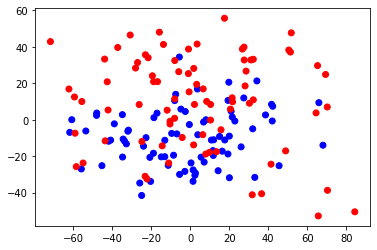

In [15]:
# Your code here:
plt.scatter('pc1', 'pc2', c = 'colors', data = df);

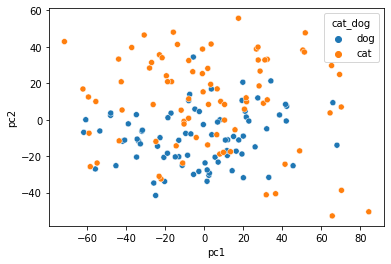

In [16]:
sns.scatterplot(x='pc1', y='pc2', hue = 'cat_dog', data = df);

Do you see a clear separation between cats and dogs? Write your answer below.

In [19]:
# Your conclusions here:
'''we can see a soft distinction between cats and dogs. 
Cats are higher on the graph. However, we cannot say with precision.'''

'we can see a soft distinction between cats and dogs. \nCats are higher on the graph. However, we cannot say with precision.'